<a href="https://colab.research.google.com/github/thalitadru/ml-class-epf/blob/main/ExampleSequentialFunctionalAPIsKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from tensorflow import keras
from keras.layers import Dense, Input, Concatenate

In [20]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])
X_val, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [28]:
model = keras.Sequential([ 
    Dense(128, activation='sigmoid', 
          input_shape=(784,)), 
    Dense(64, activation='sigmoid'),
    Dense(10)]) 

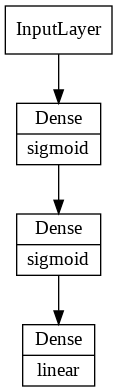

In [32]:
keras.utils.plot_model(model, show_layer_activations=True, show_layer_names=False)

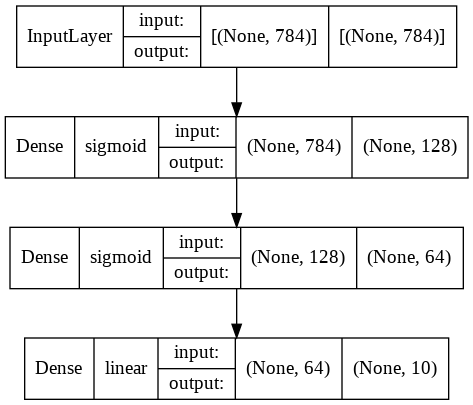

In [31]:
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True, show_layer_names=False)

In [23]:
model.compile(optimizer='SGD', 
    loss="sparse_categorical_crossentropy", 
    metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=1)
model.predict(X_val)

1719/1719 [==============================] - 5s 2ms/step - loss: 13.3068 - accuracy: 0.1124


array([[-0.35291094,  2.0018878 , -0.38962403, ..., -0.13118413,
        -0.24151924, -0.36639914],
       [-0.2993293 ,  2.0178843 , -0.38273865, ..., -0.17020282,
        -0.2744046 , -0.39041945],
       [-0.36405998,  1.9544737 , -0.3622716 , ..., -0.12943746,
        -0.22913356, -0.34163594],
       ...,
       [-0.31959173,  1.9602156 , -0.41238016, ..., -0.12014538,
        -0.24747626, -0.33929962],
       [-0.37720004,  2.0253277 , -0.37400424, ..., -0.12638818,
        -0.22552161, -0.33624986],
       [-0.3117218 ,  1.9754459 , -0.37948364, ..., -0.10773   ,
        -0.26790863, -0.30900985]], dtype=float32)

In [24]:
# declare layers
input_ = Input(shape=X_train.shape[1:])
hidden_layer1A = Dense(64, activation="sigmoid")
hidden_layer1B = Dense(64, activation="tanh")
concat_op = Concatenate()
hidden_layer2 = Dense(64, activation="relu")
output_layer = Dense(10)
# apply layers
activation1A = hidden_layer1A(input_)
activation1B = hidden_layer1B(input_)
activation1 = concat_op([activation1A, activation1B])
activation2 = hidden_layer2(activation1)
output = output_layer(activation2)

model = keras.Model(inputs=[input_], outputs=[output])

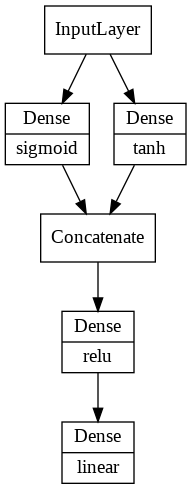

In [25]:
keras.utils.plot_model(model, show_layer_activations=True, show_layer_names=False)

In [26]:
model.compile(optimizer='SGD', 
    loss="sparse_categorical_crossentropy", 
    metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=1)
model.predict(X_val) 

1719/1719 [==============================] - 4s 2ms/step - loss: 4.2196 - accuracy: 0.1025


array([[ 4.5770063 ,  0.25620064,  2.272076  , ...,  1.2024441 ,
         4.0304427 ,  0.3254286 ],
       [ 5.1114297 , -0.37081233,  2.2203472 , ...,  0.31857023,
         2.8761322 , -0.18841657],
       [ 5.0315366 , -0.78318214,  1.7758033 , ...,  0.36907476,
         2.1812575 ,  0.48583043],
       ...,
       [ 4.9105697 , -0.7749754 ,  3.549792  , ...,  0.6382941 ,
         3.5223198 ,  0.09991888],
       [ 5.2691307 ,  1.7126672 ,  1.8108892 , ...,  0.849258  ,
         2.2897778 , -0.55737746],
       [ 3.8102446 , -0.03632255,  3.1696408 , ...,  0.04141973,
         2.1644132 , -0.15733203]], dtype=float32)